In [3]:
import numpy as np

def Lagrange_interpolation(x_points, y_points, x):

    n = len(x_points)
    result = 0.0

    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term

    return result



In [4]:
x_points = np.array([1, 2, 3, 4])
y_points = np.array([0, -5, -6, 3])

print ("Lagrange Interpolation Result at x=3.5:", Lagrange_interpolation(x_points, y_points, 3.5))

Lagrange Interpolation Result at x=3.5: -3.125


In [5]:
def newton_interpolation(x_points, y_points, x):

    n = len(x_points)
    coef = y_points.copy()

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i]= (coef[i] - coef[i-1]) / (x_points[i] - x_points[i-j])

    result = coef[n-1]
    for i in range(n-2, -1, -1):
        result = result * (x - x_points[i]) + coef[i]

    return result

In [ ]:
def parameterized_newton(x_points, y_points):
    n = len(x_points)
    coef = np.copy(y_points)

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x_points[i] - x_points[i-j])
        print(f"Divided differences of order {j}: {coef[j:n]}")
    return coef

In [32]:
import numpy as np

def parameterized_newton(x_points, y_points):
    n = len(x_points)
    coef = np.copy(y_points)  # 创建系数数组

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x_points[i] - x_points[i-j]) 
            print(f"Current coefficients:{i}", coef)  # 打印当前系数数组# 计算差商
        print(f"Divided differences of order {j}: {coef[j:n]}")  # 打印当前阶差商
        
    return coef

# 示例数据
x_new = np.array([-2.0, 0, 1.0, 4.0])
y_new = np.array([5.0, 3.0, 0.0, -5.0])

# 调用函数
coef = parameterized_newton(x_new, y_new)
print("Final Newton Coefficients:", coef)


Current coefficients:3 [ 5.          3.          0.         -1.66666667]
Current coefficients:2 [ 5.          3.         -3.         -1.66666667]
Current coefficients:1 [ 5.         -1.         -3.         -1.66666667]
Divided differences of order 1: [-1.         -3.         -1.66666667]
Current coefficients:3 [ 5.         -1.         -3.          0.33333333]
Current coefficients:2 [ 5.         -1.         -0.66666667  0.33333333]
Divided differences of order 2: [-0.66666667  0.33333333]
Current coefficients:3 [ 5.         -1.         -0.66666667  0.16666667]
Divided differences of order 3: [0.16666667]
Final Newton Coefficients: [ 5.         -1.         -0.66666667  0.16666667]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def ai_newton_interpolation(x_points, y_points, x):
    """
    牛顿插值法
    
    参数:
    x_points: 已知点的x坐标列表
    y_points: 已知点的y坐标列表  
    x: 要计算插值的点或点集
    
    返回:
    插值结果
    """
    n = len(x_points)
    
    # 计算差商表
    diff_quotient = np.zeros((n, n))
    diff_quotient[:, 0] = y_points  # 第0列为函数值
    
    # 计算各阶差商
    for j in range(1, n):
        for i in range(n - j):
            diff_quotient[i, j] = (diff_quotient[i+1, j-1] - diff_quotient[i, j-1]) / (x_points[i+j] - x_points[i])
    
    # 计算牛顿插值多项式在x处的值
    result = diff_quotient[0, 0]  # f[x0]
    product_terms = 1
    
    for i in range(1, n):
        product_terms *= (x - x_points[i-1])
        result += diff_quotient[0, i] * product_terms
    
    return result

def get_newton_polynomial(x_points, y_points):
    """
    获取牛顿插值多项式的系数表达式
    """
    n = len(x_points)
    diff_quotient = np.zeros((n, n))
    diff_quotient[:, 0] = y_points
    
    # 计算差商表
    for j in range(1, n):
        for i in range(n - j):
            diff_quotient[i, j] = (diff_quotient[i+1, j-1] - diff_quotient[i, j-1]) / (x_points[i+j] - x_points[i])
    
    return diff_quotient[0, :],diff_quotient  # 返回各阶差商（即多项式系数）

In [17]:
x_new=np.array([-2,0,1,4])
y_new=np.array([5,3,0,-5])

print("Newton Interpolation Result at x=2:", newton_interpolation(x_new, y_new, 2))

print("parameterized Newton Coefficients:", parameterized_newton(x_new, y_new))

Newton Interpolation Result at x=2: 1
Divided differences of order 1: [-1 -3 -1]
Divided differences of order 2: [0 0]
Divided differences of order 3: [0]
parameterized Newton Coefficients: [ 5 -1  0  0]


In [9]:
print (ai_newton_interpolation(x_new, y_new, 2))
print("Newton Polynomial Coefficients:", get_newton_polynomial(x_new, y_new))


-3.0
Newton Polynomial Coefficients: (array([ 5.        , -1.        , -0.66666667,  0.16666667]), array([[ 5.        , -1.        , -0.66666667,  0.16666667],
       [ 3.        , -3.        ,  0.33333333,  0.        ],
       [ 0.        , -1.66666667,  0.        ,  0.        ],
       [-5.        ,  0.        ,  0.        ,  0.        ]]))


In [1]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

(4, 1) (4, 1)


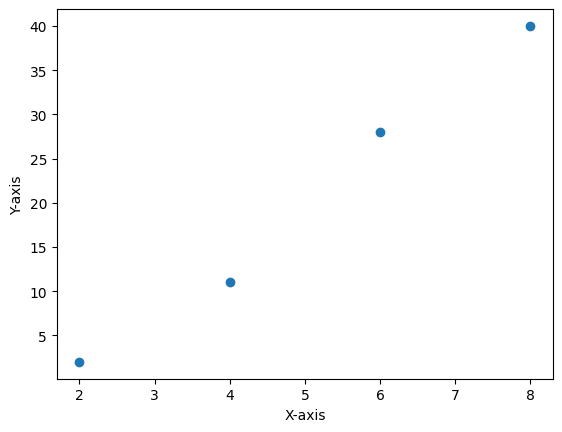

In [ ]:
X=np.array([-2,-1,0,1,2]).reshape(-1,1)
y=np.array([-0.1,0.1,28,40]).reshape(-1,1)
print(X.shape,y.shape)
plt.scatter(X,y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [6]:
model=LinearRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[[6.55]]
[-12.5]
